In [1]:
#Sahte Haber Tespiti, Spam e-posta filtreleme, Satış ve Pazarlama Faaliyetleri, Ağ trafiği sınıflandırma,
#Deprem çalışmaları, Suç ve İhlal içeren aktivitelerin tespiti

In [2]:
#K-means kümeleme

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = dataset.iloc[:, 3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


C:\Users\ITU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


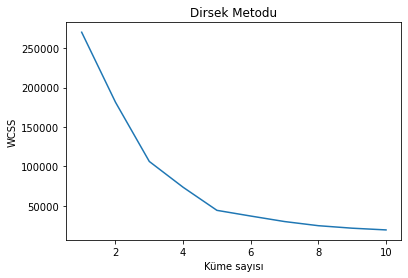

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Dirsek Metodu')
plt.xlabel('Küme sayısı')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [11]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [13]:
test = kmeans.predict([[15, #Annual Income (k$)
                       39 #Spending Score (1-100)
                       ]])
print("Bu nokta", test[0], "numaralı kümeye aittir")

Bu nokta 2 numaralı kümeye aittir


In [14]:
X[y_kmeans == 0].head()

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42


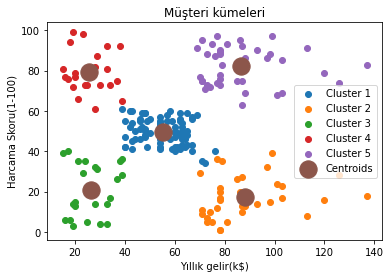

In [17]:
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centroids')
plt.title('Müşteri kümeleri')
plt.xlabel('Yıllık gelir(k$)')
plt.ylabel('Harcama Skoru(1-100)')
plt.legend()
plt.show()

In [18]:
#Hiyerarşik kümeleme 

In [19]:
#Agglomerative clustering (bottom-up yaklaşımı)

In [20]:
#Divisive clustering (top-down yaklaşımı)

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [22]:
customer_data = pd.read_csv('data/Mall_Customers.csv')

In [23]:
customer_data.shape

(200, 5)

In [24]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
data = customer_data.iloc[:, 3:5].values

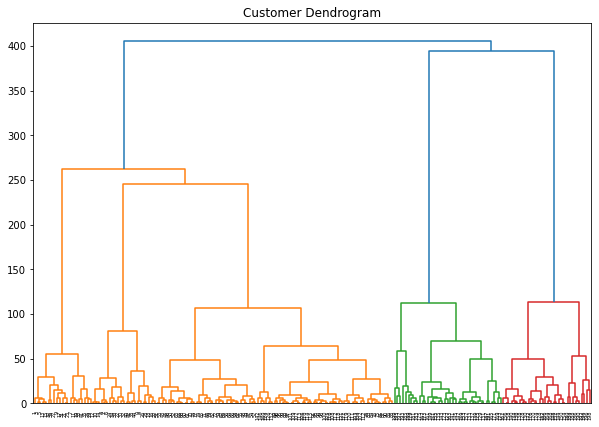

In [27]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

In [28]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

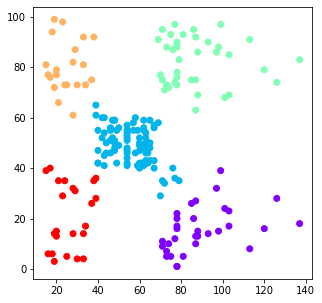

In [29]:
plt.figure(figsize = (5,5))
plt.scatter(data[:, 0], data[:, 1], c = cluster.labels_, cmap = 'rainbow')

In [30]:
import gym
env = gym.make('CartPole-v0')
for _ in range(20):
    observation = env.reset()
    for i in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(i + 1))
            break

[-0.00286325  0.00522274  0.0326069   0.02922763]
[-0.0027588   0.19986229  0.03319145 -0.25299177]
[ 0.00123845  0.39449495  0.02813162 -0.53502345]
[ 0.00912835  0.19898894  0.01743115 -0.23361088]
[0.01310813 0.00362233 0.01275893 0.06451902]
[ 0.01318057 -0.19168021  0.01404931  0.3612    ]
[ 0.00934697 -0.386999    0.02127331  0.65827966]
[ 0.00160699 -0.5824105   0.0344389   0.95758444]
[-0.01004122 -0.7779782   0.05359059  1.2608851 ]
[-0.02560079 -0.9737431   0.07880829  1.5698589 ]
[-0.04507565 -0.7796454   0.11020547  1.3027617 ]
[-0.06066855 -0.9759792   0.1362607   1.6278107 ]
[-0.08018814 -1.1724149   0.16881692  1.9596698 ]
[-0.10363644 -0.97943735  0.20801032  1.7237153 ]
Episode finished after 14 timesteps
[-0.02855576  0.04401209 -0.0233369  -0.04229188]
[-0.02767552 -0.15076758 -0.02418274  0.24293764]
[-0.03069087  0.0446913  -0.01932399 -0.05727399]
[-0.02979705 -0.15014833 -0.02046947  0.22924998]
[-0.03280001  0.04526006 -0.01588447 -0.0698188 ]
[-0.03189481  0.24

In [1]:
import neurolab as nl